In [3]:
pip install tqdm



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import random
import cv2
import tqdm as tqdm

In [9]:
pip install tensorflow


  Using cached tensorflow-2.18.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.28.3-cp38-abi3-macosx_10_9_universal2.whl.metadata (592 bytes)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached wrapt-1.16.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.6 kB)
  Using cached grpcio-1.67.1-cp312-cp312-macosx_10_9_universal2.whl.metadata (3.9 kB)
  Using cached tensor

In [14]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
root_dir = "/Users/abijiththiyagarajan/Desktop/DMT/dataset"
os.listdir(root_dir)

['cloudy',
 '.DS_Store',
 'shine',
 'test.csv',
 'sunrise',
 'rainy',
 'alien_test',
 'foggy']

In [16]:
foggy = "/Users/abijiththiyagarajan/Desktop/DMT/dataset/foggy"
sunrise = "/Users/abijiththiyagarajan/Desktop/DMT/dataset/sunrise"
shine = "/Users/abijiththiyagarajan/Desktop/DMT/dataset/shine"
rainy = "/Users/abijiththiyagarajan/Desktop/DMT/dataset/rainy"
cloudy = "/Users/abijiththiyagarajan/Desktop/DMT/dataset/cloudy"
test = "/Users/abijiththiyagarajan/Desktop/DMT/dataset/alien_test"

In [17]:
import os


In [18]:
print("Number of Images in Each Directory:")
print(f"Foggy: {len(os.listdir(foggy))}")
print(f"Sunrise: {len(os.listdir(sunrise))}")
print(f"Shine: {len(os.listdir(shine))}")
print(f"Rainy: {len(os.listdir(rainy))}")
print(f"Cloudy: {len(os.listdir(cloudy))}")

Number of Images in Each Directory:
Foggy: 300
Sunrise: 350
Shine: 250
Rainy: 300
Cloudy: 300


In [20]:
x = []
y = []
dataset =[]
def create_dataset(directory,dir_name):
    for i in tqdm.tqdm(os.listdir(directory)):
        full_path = os.path.join(directory,i)
        try:
            img = cv2.imread(full_path)
            img = cv2.resize(img,(150,150))
        except:
            continue
        x.append(img)
        y.append(dir_name)
    return x,y
x,y= create_dataset(foggy,"foggy")
x,y= create_dataset(sunrise,"sunrise")
x,y= create_dataset(shine,"shine")
x,y= create_dataset(rainy,"rainy")
x,y= create_dataset(cloudy,"cloudy")

100%|██████████| 300/300 [00:00<00:00, 901.95it/s]


In [21]:
import numpy as np

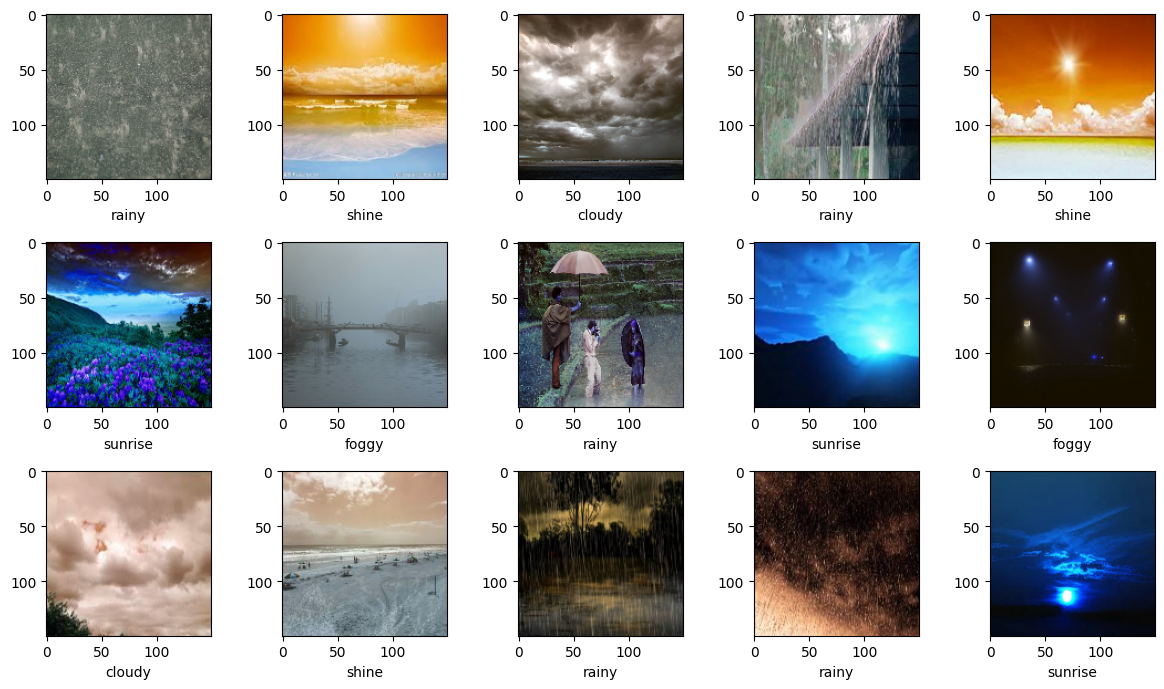

In [25]:
x = np.array(x)
y = np.array(y)
x.shape,y.shape
#plotting images
fig = plt.figure(figsize=(12,7))
for i in range(15):
    sample = random.choice(range(len(x)))
    image = x[sample]
    category = y[sample]
    plt.subplot(3,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(image)
    plt.xlabel(category)
plt.tight_layout()
plt.show()

In [26]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
img_size =150
x_train = np.array(x_train)/255.0
x_test = np.array(x_test)/255.0

In [29]:
x_train = x_train.reshape(-1,img_size,img_size,3)
y_train = np.array(y_train)
x_test = x_test.reshape(-1,img_size,img_size,3)
y_test = np.array(y_test)

In [32]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train_lb = lb.fit_transform(y_train)
y_test_lb = lb.fit_transform(y_test)
y_train_lb.shape,y_test_lb.shape
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')  # Assuming 5 weather classes
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("vgg19.keras", monitor="val_accuracy", verbose=1,
save_best_only=True, save_weights_only=False)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,verbose=1)
unique,counts = np.unique(y_train_lb,return_counts=True)
print(unique,counts)
batch_size=32
history = model.fit(x_train,y_train_lb,epochs=15,validation_data=(x_test,y_test_lb),
batch_size=32 ,verbose=1,callbacks=[checkpoint,earlystop])
# Assuming x_test is your test data and y_test_lb is the corresponding labels
loss, accuracy = model.evaluate(x_test, y_test_lb)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

In [35]:
import numpy as np
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([2, 1, 3, 1, 3, 3, 2, 0, 4, 1, 3, 0, 0, 0, 1, 2, 3, 2, 4, 1, 4, 4,
       1, 0, 0, 4, 0, 0, 1, 0, 1, 4, 3, 0, 2, 2, 4, 4, 4, 1, 4, 3, 2, 1,
       0, 4, 2, 4, 4, 0, 2, 2, 4, 2, 4, 2, 1, 0, 1, 0, 2, 2, 0, 1, 3, 4,
       4, 0, 0, 2, 2, 2, 4, 4, 1, 4, 4, 4, 3, 4, 2, 2, 1, 0, 1, 2, 2, 3,
       3, 4, 2, 4, 2, 2, 2, 2, 4, 1, 4, 2, 0, 3, 3, 3, 0, 1, 2, 1, 1, 4,
       4, 0, 3, 3, 1, 4, 3, 0, 4, 2, 3, 4, 0, 4, 1, 2, 3, 0, 3, 2, 2, 1,
       4, 2, 4, 1, 2, 4, 2, 1, 4, 2, 1, 2, 1, 4, 4, 0, 3, 0, 2, 2, 4, 4,
       3, 0, 4, 3, 1, 4, 2, 2, 4, 4, 1, 4, 0, 2, 4, 4, 2, 4, 2, 1, 3, 4,
       2, 4, 3, 1, 2, 0, 1, 3, 0, 2, 1, 4, 4, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       2, 2, 2, 4, 0, 2, 2, 4, 2, 4, 4, 1, 3, 2, 2, 1, 0, 4, 2, 0, 1, 1,
       0, 2, 2, 4, 2, 2, 1, 0, 0, 4, 4, 2, 2, 2, 0, 0, 0, 0, 3, 4, 3, 2,
       4, 3, 3, 2, 1, 2, 2, 2, 3, 3, 2, 4, 0, 2, 2, 2, 2, 2, 1, 0, 2, 1,
       2, 4, 2, 4, 2, 0, 1, 4, 3, 2, 3, 3, 0, 2, 2, 4, 0, 1, 2, 2, 2, 1,
       0, 1, 2, 3, 0, 2, 0, 0, 2, 4, 1, 2, 1, 4])

In [36]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75        60
           1       0.72      0.68      0.70        56
           2       0.77      0.96      0.86        71
           3       0.92      0.76      0.83        45
           4       0.93      0.96      0.94        68

    accuracy                           0.82       300
   macro avg       0.83      0.81      0.81       300
weighted avg       0.83      0.82      0.82       300



In [38]:
pip install mlxtend


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


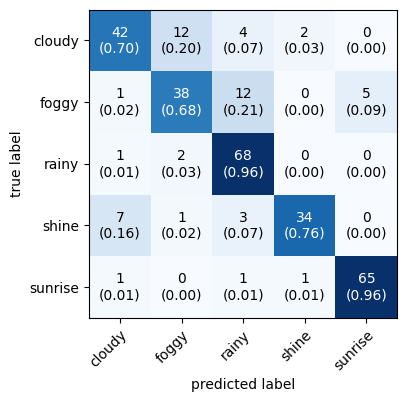

In [39]:
#confusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred_classes)
plot_confusion_matrix(conf_mat = cm,figsize=(6,4),class_names =["cloudy","foggy","rainy","shine","sunrise"],show_normed = True);

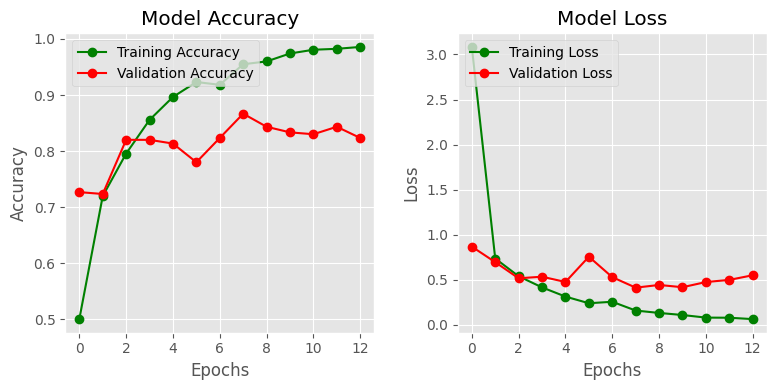

In [41]:
#learning curve
import matplotlib.pyplot as plt
# Plotting the learning curve
plt.style.use("ggplot")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
# Accuracy plot
axes[0].plot(history.epoch, history.history['accuracy'], 'go-', label='Training Accuracy')
axes[0].plot(history.epoch, history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='upper left')
# Loss plot
axes[1].plot(history.epoch, history.history['loss'], 'go-', label='Training Loss')
axes[1].plot(history.epoch, history.history['val_loss'], 'ro-', label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend(loc='upper left')
plt.tight_layout()
plt.show()

In [43]:
pip install gradio


  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 1.6 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 1.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 1.5 MB/s eta 0:00:00a 0:00:01
Using cached click-8.1.7-py3-none-any.whl (97 kB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
data_dir=r'/Users/abijiththiyagarajan/Desktop/DMT\dataset'
import gradio as gr
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [56]:
data_dir = '/Users/abijiththiyagarajan/Desktop/DMT/dataset'


In [57]:
img_height, img_width = 180, 180
batch_size = 32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="training",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size
)
al_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="validation",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size
)
class_names = train_ds.class_names
print(class_names)

Found 1530 files belonging to 6 classes.
Using 1224 files for training.
Found 1530 files belonging to 6 classes.
Using 306 files for validation.
['alien_test', 'cloudy', 'foggy', 'rainy', 'shine', 'sunrise']


In [59]:
img_height, img_width = 180, 180
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 1530 files belonging to 6 classes.
Using 1224 files for training.
Found 1530 files belonging to 6 classes.
Using 306 files for validation.


In [60]:
num_classes = len(class_names)
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
model = Sequential([
layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes, activation='softmax')
])
model.compile(
optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy']
)
epochs = 10
history = model.fit(
train_ds,
validation_data=val_ds,
epochs=epochs
)
model.layers
model.metrics_names
train_loss, train_accuracy = model.evaluate(train_ds)
val_loss, val_accuracy = model.evaluate(val_ds)
print('Training Loss:', train_loss)
print('Training Accuracy:', train_accuracy)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_accuracy)

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 493ms/step - accuracy: 0.4756 - loss: 1.3983 - val_accuracy: 0.6732 - val_loss: 0.9240
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 16s 406ms/step - accuracy: 0.7187 - loss: 0.8092 - val_accuracy: 0.7288 - val_loss: 0.8044
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 17s 418ms/step - accuracy: 0.7629 - loss: 0.6953 - val_accuracy: 0.7647 - val_loss: 0.7723
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 17s 434ms/step - accuracy: 0.7988 - loss: 0.5581 - val_accuracy: 0.7549 - val_loss: 0.8200
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 17s 420ms/step - accuracy: 0.8252 - loss: 0.4901 - val_accuracy: 0.7778 - val_loss: 0.7730
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 506ms/step - accuracy: 0.8787 - loss: 0.3577 - val_accuracy: 0.8105 - val_loss: 0.6960
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 19s 472ms/step - accuracy: 0.9253 - loss: 0.2286 - val_accuracy: 0.7941 - val_loss: 0.7786
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 511ms/step - accuracy: 0.9363 - loss: 0.1984 - val_accuracy: 0.797

In [61]:
from sklearn.metrics import classification_report
import numpy as np
predictions = model.predict(train_ds)
prediction_classes = np.argmax(predictions, axis=1)
from sklearn.metrics import classification_report
# Assuming train_ds contains both input data and target labels
# Extract the true labels from train_ds
true_labels = []
for images, labels in train_ds:
    true_labels.extend(labels.numpy())
# Generate classification report using true labels and predicted classes
report = classification_report(true_labels, prediction_classes)
print(report)

39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 165ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.21      0.18      0.19       251
           2       0.14      0.13      0.14       223
           3       0.21      0.24      0.22       246
           4       0.18      0.19      0.18       199
           5       0.19      0.20      0.20       282

    accuracy                           0.19      1224
   macro avg       0.15      0.16      0.16      1224
weighted avg       0.18      0.19      0.18      1224



2024-10-30 13:37:49.124079: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [62]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
model.save(r'/Users/abijiththiyagarajan/Desktop/DMT/dataset\model.h5')
model = load_model(r'/Users/abijiththiyagarajan/Desktop/DMT/dataset\model.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
r'/Users/abijiththiyagarajan/Desktop/DMT/dataset',
target_size=(img_height, img_width),
batch_size=batch_size,
class_mode='categorical',
shuffle=False
)

Found 1530 images belonging to 6 classes.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step


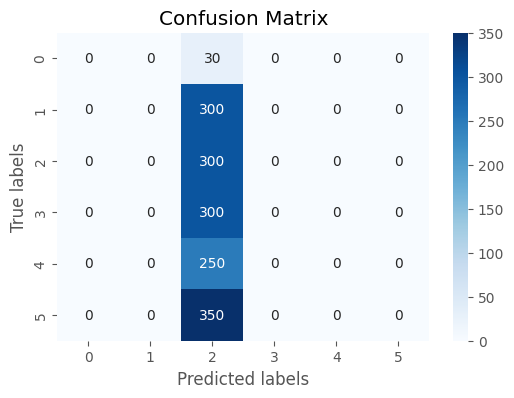

In [63]:
# Get true labels
y_true = test_generator.classes
# Make predictions
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

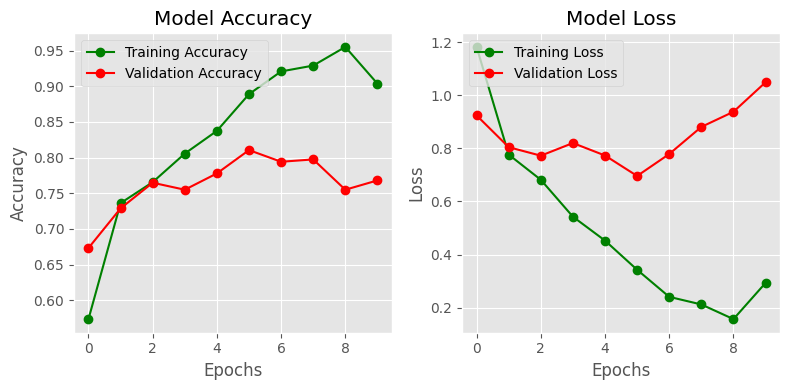

In [64]:
#learning curve
import matplotlib.pyplot as plt
# Plotting the learning curve
plt.style.use("ggplot")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
# Accuracy plot
axes[0].plot(history.epoch, history.history['accuracy'], 'go-', label='Training Accuracy')
axes[0].plot(history.epoch, history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='upper left')
# Loss plot
axes[1].plot(history.epoch, history.history['loss'], 'go-', label='Training Loss')
axes[1].plot(history.epoch, history.history['val_loss'], 'ro-', label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend(loc='upper left')
plt.tight_layout()
plt.show()